# Deep Cost-to-Go (DC2G)
Michael Everett, Justin Miller, Jonathan P. How, "Planning Beyond the Sensing Horizon Using a Learned Context", IROS 2019 (Best Paper on Cognitive Robotics)

Paper: https://arxiv.org/abs/1908.09171

Video: https://youtu.be/yVlnbqEFct0

**Goal:** This notebook explains how to initialize the environment and plan one episode with a chosen planner.

### Import libraries

In [156]:
import sys
sys.path.insert(0,'gym-minigrid')
from dc2g.planners.util import instantiate_planner
import dc2g.driveway_env
import gym, gym_minigrid
import matplotlib.pyplot as plt

### Initialize the environment

In [157]:
env = gym.make('MiniGrid-DrivewayEnv-32x32-v0')
env.seed(seed=0)
env.use_semantic_coloring = True
difficulty_level = 'test_scenario'
env.set_difficulty_level(difficulty_level)
obs = env.reset()

### See full environment map

Full environment map:


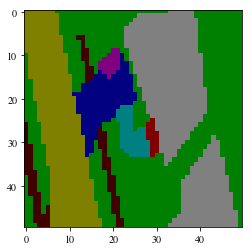

In [3]:
plt.imshow(env.world_array)
print("Full environment map:")

### Show components of initial observation

Current position: [ 6 23]
Current heading (radians): 0.0
Current heading index (discretized): 0
Current direction: 0
Current mission: get to the yellow goal square

Current semantic gridmap:


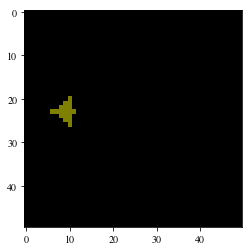

In [4]:
print('Current position: {}'.format(obs['pos']))
print('Current heading (radians): {}'.format(obs['theta']))
print('Current heading index (discretized): {}'.format(obs['theta_ind']))
print('Current direction: {}'.format(obs['direction']))
print('Current mission: {}'.format(obs['mission']))
print('')
print('Current semantic gridmap:')
plt.imshow(obs['semantic_gridmap'])
plt.show()

### Initialize the planner

In [5]:
''' Choose one of ["frontier", "dc2g", "dc2g_rescale", "oracle"] '''
# planner_name = "frontier"
planner_name = "dc2g"
# planner_name = "dc2g_rescale"
# planner_name = "oracle"
planner = instantiate_planner(planner_name, env, "MiniGrid")

INFO:tensorflow:Restoring parameters from /mnt/ubuntu_extra_ssd3/code/dc2g/dc2g/planners/../../data/trained_networks/driveways_bing_iros19_full_test_works/export
loaded model.


### Choose whether to visualize planner or not

In [6]:
planner.plot_panels = False

### Run an episode

Planner: DC2G 
---
Current state: (px: 7, py: 23, theta: 0)
Current state: (px: 8, py: 23, theta: 0)
Current state: (px: 9, py: 23, theta: 0)
Current state: (px: 10, py: 23, theta: 0)
Current state: (px: 11, py: 23, theta: 0)
Current state: (px: 12, py: 23, theta: 0)
Current state: (px: 13, py: 23, theta: 0)
Current state: (px: 13, py: 23, theta: 1)
Current state: (px: 13, py: 23, theta: 0)
Current state: (px: 14, py: 23, theta: 0)
Current state: (px: 15, py: 23, theta: 0)
Current state: (px: 16, py: 23, theta: 0)
Current state: (px: 17, py: 23, theta: 0)
Current state: (px: 18, py: 23, theta: 0)
Current state: (px: 19, py: 23, theta: 0)
Current state: (px: 19, py: 23, theta: 1)
Current state: (px: 19, py: 24, theta: 1)
Current state: (px: 19, py: 24, theta: 0)
Current state: (px: 20, py: 24, theta: 0)
Current state: (px: 21, py: 24, theta: 0)
Current state: (px: 21, py: 24, theta: 1)
Current state: (px: 21, py: 25, theta: 1)
Current state: (px: 21, py: 25, theta: 0)
Current state: (px

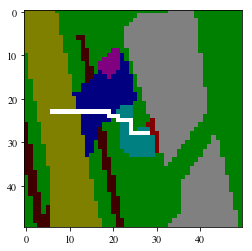

In [7]:
print("Planner: {name} \n---".format(name=planner.name))
while env.step_count < env.max_steps:

    # Use latest observation to choose next action
    if obs['semantic_gridmap'] is None:
        action = 0
    else:
        action = planner.plan(obs)

    # Execute the action in the environment and receive new observation
    obs, reward, done, info = env.step(action)

    print("Current state: (px: {}, py: {}, theta: {})".format(obs['pos'][0], obs['pos'][1], obs['theta_ind']))

    # env.render('human')
    if done:
        print('Done! Took {} steps.'.format(env.step_count))
        plt.imshow(env.render())
        plt.show()
#         planner.animate_episode(fig_type="observation")
        break

### Alternatively, can call the run_epsiode method

INFO:tensorflow:Restoring parameters from /mnt/ubuntu_extra_ssd3/code/dc2g/dc2g/planners/../../data/trained_networks/driveways_bing_iros19_full_test_works/export
loaded model.
[ 7 23] 0
[ 8 23] 0
[ 9 23] 0
[10 23] 0
[11 23] 0
[12 23] 0
[13 23] 0
[13 23] 1
[13 23] 0
[14 23] 0
[15 23] 0
[16 23] 0
[17 23] 0
[18 23] 0
[19 23] 0
[19 23] 1
[19 24] 1
[19 24] 0
[20 24] 0
[21 24] 0
[21 24] 1
[21 25] 1
[21 25] 0
[22 25] 0
[23 25] 0
[24 25] 0
[24 25] 1
[24 26] 1
[24 27] 1
[24 28] 1
[24 28] 0
[25 28] 0
[26 28] 0
[27 28] 0
[28 28] 0
Goal reached!
[29 28] 0
Done! Took 36 steps.


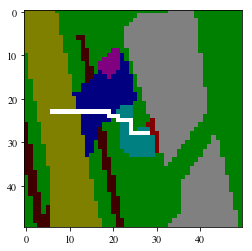

In [8]:
from dc2g.run_episode import start_experiment, run_episode
env = start_experiment(
        env_name='MiniGrid-DrivewayEnv-32x32-v0',
        env_type="MiniGrid",
        )
success, num_steps, world_id = run_episode(
    planner_name="dc2g",
    seed=0,
    env=env,
    env_type="MiniGrid",
    difficulty_level='test_scenario',
    plot_panels=False
    )
plt.imshow(env.render())
plt.show()

In [158]:
results = {'very_hard': {0: {'oracle': {'num_steps': 23, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 32, 'success': True}, 'frontier': {'num_steps': 110, 'success': True}}, 1: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 276, 'success': True}}, 2: {'oracle': {'num_steps': 26, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 28, 'success': True}, 'frontier': {'num_steps': 127, 'success': True}}, 3: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 44, 'success': True}, 'frontier': {'num_steps': 101, 'success': True}}, 4: {'oracle': {'num_steps': 31, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 56, 'success': True}, 'frontier': {'num_steps': 164, 'success': True}}, 5: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 248, 'success': True}}, 6: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 267, 'success': True}}, 7: {'oracle': {'num_steps': 20, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 24, 'success': True}, 'frontier': {'num_steps': 194, 'success': True}}, 8: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 56, 'success': True}, 'frontier': {'num_steps': 121, 'success': True}}, 9: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 68, 'success': True}, 'frontier': {'num_steps': 204, 'success': True}}, 10: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 54, 'success': True}, 'frontier': {'num_steps': 273, 'success': True}}, 11: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 193, 'success': True}, 'frontier': {'num_steps': 102, 'success': True}}, 12: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 75, 'success': True}, 'frontier': {'num_steps': 179, 'success': True}}, 13: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 75, 'success': True}, 'frontier': {'num_steps': 83, 'success': True}}, 14: {'oracle': {'num_steps': 21, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 104, 'success': True}}, 15: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 209, 'success': True}}, 16: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 75, 'success': True}}, 17: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 74, 'success': True}, 'frontier': {'num_steps': 68, 'success': True}}, 18: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 120, 'success': True}}, 19: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 56, 'success': True}, 'frontier': {'num_steps': 81, 'success': True}}, 20: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 56, 'success': True}, 'frontier': {'num_steps': 63, 'success': True}}, 21: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 133, 'success': True}, 'frontier': {'num_steps': 219, 'success': True}}, 22: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 79, 'success': True}}, 23: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 239, 'success': True}}, 24: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 30, 'success': True}, 'frontier': {'num_steps': 119, 'success': True}}, 25: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 48, 'success': True}, 'frontier': {'num_steps': 268, 'success': True}}, 26: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 103, 'success': True}, 'frontier': {'num_steps': 70, 'success': True}}, 27: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 279, 'success': True}}, 28: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 99, 'success': True}, 'frontier': {'num_steps': 239, 'success': True}}, 29: {'oracle': {'num_steps': 26, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 38, 'success': True}, 'frontier': {'num_steps': 257, 'success': True}}, 30: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 162, 'success': True}, 'frontier': {'num_steps': 113, 'success': True}}, 31: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 217, 'success': True}}, 32: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 61, 'success': True}, 'frontier': {'num_steps': 118, 'success': True}}, 33: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 69, 'success': True}, 'frontier': {'num_steps': 64, 'success': True}}, 34: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 133, 'success': True}, 'frontier': {'num_steps': 94, 'success': True}}, 35: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 186, 'success': True}, 'frontier': {'num_steps': 276, 'success': True}}, 36: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 67, 'success': True}, 'frontier': {'num_steps': 221, 'success': True}}, 37: {'oracle': {'num_steps': 55, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 122, 'success': True}, 'frontier': {'num_steps': 324, 'success': True}}, 38: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 44, 'success': True}, 'frontier': {'num_steps': 183, 'success': True}}, 39: {'oracle': {'num_steps': 25, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 89, 'success': True}}, 40: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 100, 'success': True}}, 41: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 34, 'success': True}, 'frontier': {'num_steps': 323, 'success': True}}, 42: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 44, 'success': True}, 'frontier': {'num_steps': 59, 'success': True}}, 43: {'oracle': {'num_steps': 52, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 189, 'success': True}, 'frontier': {'num_steps': 291, 'success': True}}, 44: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 57, 'success': True}, 'frontier': {'num_steps': 101, 'success': True}}, 45: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 147, 'success': True}}, 46: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 32, 'success': True}, 'frontier': {'num_steps': 131, 'success': True}}, 47: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 57, 'success': True}, 'frontier': {'num_steps': 61, 'success': True}}, 48: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 171, 'success': True}}, 49: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 106, 'success': True}, 'frontier': {'num_steps': 186, 'success': True}}, 50: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 134, 'success': True}}, 51: {'oracle': {'num_steps': 22, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 22, 'success': True}, 'frontier': {'num_steps': 100, 'success': True}}, 52: {'oracle': {'num_steps': 27, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 216, 'success': True}}, 53: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 103, 'success': True}}, 54: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 261, 'success': True}}, 55: {'oracle': {'num_steps': 50, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 109, 'success': True}, 'frontier': {'num_steps': 113, 'success': True}}, 56: {'oracle': {'num_steps': 21, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 85, 'success': True}, 'frontier': {'num_steps': 223, 'success': True}}, 57: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 52, 'success': True}, 'frontier': {'num_steps': 294, 'success': True}}, 58: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 90, 'success': True}}, 59: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 132, 'success': True}}, 60: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 54, 'success': True}, 'frontier': {'num_steps': 260, 'success': True}}, 61: {'oracle': {'num_steps': 23, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 71, 'success': True}}, 62: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 86, 'success': True}, 'frontier': {'num_steps': 233, 'success': True}}, 63: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 95, 'success': True}, 'frontier': {'num_steps': 208, 'success': True}}, 64: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 52, 'success': True}, 'frontier': {'num_steps': 47, 'success': True}}, 65: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 42, 'success': True}, 'frontier': {'num_steps': 117, 'success': True}}, 66: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 67, 'success': True}, 'frontier': {'num_steps': 81, 'success': True}}, 67: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 68, 'success': True}, 'frontier': {'num_steps': 108, 'success': True}}, 68: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 47, 'success': True}, 'frontier': {'num_steps': 155, 'success': True}}, 69: {'oracle': {'num_steps': 27, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 199, 'success': True}}, 70: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn004m000h004', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 171, 'success': True}}, 71: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 83, 'success': True}, 'frontier': {'num_steps': 57, 'success': True}}, 72: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 286, 'success': True}}, 73: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 42, 'success': True}, 'frontier': {'num_steps': 140, 'success': True}}, 74: {'oracle': {'num_steps': 21, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 42, 'success': True}, 'frontier': {'num_steps': 46, 'success': True}}, 75: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 42, 'success': True}, 'frontier': {'num_steps': 69, 'success': True}}, 76: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 171, 'success': True}}, 77: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 73, 'success': True}}, 78: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 44, 'success': True}, 'frontier': {'num_steps': 131, 'success': True}}, 79: {'oracle': {'num_steps': 22, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 26, 'success': True}, 'frontier': {'num_steps': 108, 'success': True}}, 80: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 170, 'success': True}}, 81: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 75, 'success': True}, 'frontier': {'num_steps': 80, 'success': True}}, 82: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 73, 'success': True}}, 83: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 52, 'success': True}, 'frontier': {'num_steps': 115, 'success': True}}, 84: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 98, 'success': True}, 'frontier': {'num_steps': 206, 'success': True}}, 85: {'oracle': {'num_steps': 31, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 118, 'success': True}}, 86: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 61, 'success': True}, 'frontier': {'num_steps': 66, 'success': True}}, 87: {'oracle': {'num_steps': 26, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 94, 'success': True}}, 88: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 48, 'success': True}, 'frontier': {'num_steps': 84, 'success': True}}, 89: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 72, 'success': True}, 'frontier': {'num_steps': 85, 'success': True}}, 90: {'oracle': {'num_steps': 20, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 28, 'success': True}, 'frontier': {'num_steps': 68, 'success': True}}, 91: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn004m000h003', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 181, 'success': True}}, 92: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn004m000h002', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 146, 'success': True}}, 93: {'oracle': {'num_steps': 61, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 138, 'success': True}, 'frontier': {'num_steps': 164, 'success': True}}, 94: {'oracle': {'num_steps': 19, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 19, 'success': True}, 'frontier': {'num_steps': 76, 'success': True}}, 95: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 86, 'success': True}}, 96: {'oracle': {'num_steps': 31, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 441, 'success': True}}, 97: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 329, 'success': True}}, 98: {'oracle': {'num_steps': 23, 'success': True}, 'world_id': 'worldn004m000h001', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 68, 'success': True}}, 99: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn004m000h000', 'dc2g': {'num_steps': 38, 'success': True}, 'frontier': {'num_steps': 255, 'success': True}}}, 'medium': {0: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 466, 'success': True}}, 1: {'oracle': {'num_steps': 67, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 83, 'success': True}, 'frontier': {'num_steps': 175, 'success': True}}, 2: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 212, 'success': True}}, 3: {'oracle': {'num_steps': 68, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 143, 'success': True}}, 4: {'oracle': {'num_steps': 89, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 113, 'success': True}, 'frontier': {'num_steps': 237, 'success': True}}, 5: {'oracle': {'num_steps': 85, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 93, 'success': True}, 'frontier': {'num_steps': 265, 'success': True}}, 6: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 142, 'success': True}, 'frontier': {'num_steps': 500, 'success': True}}, 7: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 475, 'success': True}}, 8: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 104, 'success': True}, 'frontier': {'num_steps': 492, 'success': True}}, 9: {'oracle': {'num_steps': 88, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 92, 'success': True}, 'frontier': {'num_steps': 297, 'success': True}}, 10: {'oracle': {'num_steps': 57, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 78, 'success': True}, 'frontier': {'num_steps': 468, 'success': True}}, 11: {'oracle': {'num_steps': 79, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 81, 'success': True}, 'frontier': {'num_steps': 172, 'success': True}}, 12: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 172, 'success': True}, 'frontier': {'num_steps': 473, 'success': True}}, 13: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 61, 'success': True}, 'frontier': {'num_steps': 258, 'success': True}}, 14: {'oracle': {'num_steps': 76, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 209, 'success': True}, 'frontier': {'num_steps': 457, 'success': True}}, 15: {'oracle': {'num_steps': 69, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 259, 'success': True}}, 16: {'oracle': {'num_steps': 83, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 161, 'success': True}, 'frontier': {'num_steps': 150, 'success': True}}, 17: {'oracle': {'num_steps': 76, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 86, 'success': True}, 'frontier': {'num_steps': 228, 'success': True}}, 18: {'oracle': {'num_steps': 67, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 77, 'success': True}, 'frontier': {'num_steps': 169, 'success': True}}, 19: {'oracle': {'num_steps': 79, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 152, 'success': True}, 'frontier': {'num_steps': 406, 'success': True}}, 20: {'oracle': {'num_steps': 89, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 119, 'success': True}, 'frontier': {'num_steps': 222, 'success': True}}, 21: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 90, 'success': True}, 'frontier': {'num_steps': 75, 'success': True}}, 22: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 72, 'success': True}, 'frontier': {'num_steps': 167, 'success': True}}, 23: {'oracle': {'num_steps': 72, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 77, 'success': True}, 'frontier': {'num_steps': 138, 'success': True}}, 24: {'oracle': {'num_steps': 64, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 66, 'success': True}, 'frontier': {'num_steps': 362, 'success': True}}, 25: {'oracle': {'num_steps': 68, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 346, 'success': True}}, 26: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 132, 'success': True}}, 27: {'oracle': {'num_steps': 101, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 111, 'success': True}, 'frontier': {'num_steps': 177, 'success': True}}, 28: {'oracle': {'num_steps': 81, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 129, 'success': True}, 'frontier': {'num_steps': 163, 'success': True}}, 29: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 190, 'success': True}}, 30: {'oracle': {'num_steps': 71, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 85, 'success': True}, 'frontier': {'num_steps': 237, 'success': True}}, 31: {'oracle': {'num_steps': 71, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 101, 'success': True}, 'frontier': {'num_steps': 181, 'success': True}}, 32: {'oracle': {'num_steps': 89, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 113, 'success': True}, 'frontier': {'num_steps': 324, 'success': True}}, 33: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 81, 'success': True}, 'frontier': {'num_steps': 337, 'success': True}}, 34: {'oracle': {'num_steps': 76, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 85, 'success': True}, 'frontier': {'num_steps': 142, 'success': True}}, 35: {'oracle': {'num_steps': 81, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 83, 'success': True}, 'frontier': {'num_steps': 261, 'success': True}}, 36: {'oracle': {'num_steps': 60, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 253, 'success': True}, 'frontier': {'num_steps': 131, 'success': True}}, 37: {'oracle': {'num_steps': 81, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 87, 'success': True}, 'frontier': {'num_steps': 289, 'success': True}}, 38: {'oracle': {'num_steps': 72, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 83, 'success': True}, 'frontier': {'num_steps': 262, 'success': True}}, 39: {'oracle': {'num_steps': 57, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 216, 'success': True}, 'frontier': {'num_steps': 236, 'success': True}}, 40: {'oracle': {'num_steps': 83, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 177, 'success': True}, 'frontier': {'num_steps': 142, 'success': True}}, 41: {'oracle': {'num_steps': 88, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 96, 'success': True}, 'frontier': {'num_steps': 270, 'success': True}}, 42: {'oracle': {'num_steps': 68, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 346, 'success': True}}, 43: {'oracle': {'num_steps': 74, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 100, 'success': True}, 'frontier': {'num_steps': 152, 'success': True}}, 44: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 500, 'success': True}, 'frontier': {'num_steps': 258, 'success': True}}, 45: {'oracle': {'num_steps': 66, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 72, 'success': True}, 'frontier': {'num_steps': 127, 'success': True}}, 46: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 87, 'success': True}, 'frontier': {'num_steps': 232, 'success': True}}, 47: {'oracle': {'num_steps': 70, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 133, 'success': True}, 'frontier': {'num_steps': 153, 'success': True}}, 48: {'oracle': {'num_steps': 80, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 327, 'success': True}}, 49: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 139, 'success': True}}, 50: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 47, 'success': True}, 'frontier': {'num_steps': 167, 'success': True}}, 51: {'oracle': {'num_steps': 63, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 214, 'success': True}, 'frontier': {'num_steps': 138, 'success': True}}, 52: {'oracle': {'num_steps': 81, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 91, 'success': True}, 'frontier': {'num_steps': 161, 'success': True}}, 53: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 226, 'success': True}}, 54: {'oracle': {'num_steps': 71, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 206, 'success': True}, 'frontier': {'num_steps': 150, 'success': True}}, 55: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 121, 'success': True}, 'frontier': {'num_steps': 476, 'success': True}}, 56: {'oracle': {'num_steps': 107, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 111, 'success': True}, 'frontier': {'num_steps': 176, 'success': True}}, 57: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 223, 'success': True}}, 58: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 174, 'success': True}}, 59: {'oracle': {'num_steps': 61, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 114, 'success': True}, 'frontier': {'num_steps': 194, 'success': True}}, 60: {'oracle': {'num_steps': 73, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 78, 'success': True}, 'frontier': {'num_steps': 143, 'success': True}}, 61: {'oracle': {'num_steps': 71, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 270, 'success': True}}, 62: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 217, 'success': True}}, 63: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 98, 'success': True}, 'frontier': {'num_steps': 59, 'success': True}}, 64: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 246, 'success': True}}, 65: {'oracle': {'num_steps': 66, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 105, 'success': True}, 'frontier': {'num_steps': 301, 'success': True}}, 66: {'oracle': {'num_steps': 71, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 77, 'success': True}, 'frontier': {'num_steps': 257, 'success': True}}, 67: {'oracle': {'num_steps': 52, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 130, 'success': True}}, 68: {'oracle': {'num_steps': 88, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 106, 'success': True}, 'frontier': {'num_steps': 272, 'success': True}}, 69: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 221, 'success': True}}, 70: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 48, 'success': True}, 'frontier': {'num_steps': 169, 'success': True}}, 71: {'oracle': {'num_steps': 57, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 156, 'success': True}}, 72: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 275, 'success': True}}, 73: {'oracle': {'num_steps': 72, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 90, 'success': True}, 'frontier': {'num_steps': 139, 'success': True}}, 74: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn001m003h000', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 265, 'success': True}}, 75: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 99, 'success': True}, 'frontier': {'num_steps': 472, 'success': True}}, 76: {'oracle': {'num_steps': 75, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 78, 'success': True}, 'frontier': {'num_steps': 153, 'success': True}}, 77: {'oracle': {'num_steps': 70, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 80, 'success': True}, 'frontier': {'num_steps': 242, 'success': True}}, 78: {'oracle': {'num_steps': 70, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 75, 'success': True}, 'frontier': {'num_steps': 160, 'success': True}}, 79: {'oracle': {'num_steps': 110, 'success': True}, 'world_id': 'worldn001m004h000', 'dc2g': {'num_steps': 128, 'success': True}, 'frontier': {'num_steps': 335, 'success': True}}, 80: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 245, 'success': True}}, 81: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 69, 'success': True}, 'frontier': {'num_steps': 111, 'success': True}}, 82: {'oracle': {'num_steps': 74, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 83, 'success': True}, 'frontier': {'num_steps': 280, 'success': True}}, 83: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 52, 'success': True}, 'frontier': {'num_steps': 138, 'success': True}}, 84: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 42, 'success': True}, 'frontier': {'num_steps': 190, 'success': True}}, 85: {'oracle': {'num_steps': 93, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 109, 'success': True}, 'frontier': {'num_steps': 259, 'success': True}}, 86: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 65, 'success': True}, 'frontier': {'num_steps': 179, 'success': True}}, 87: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 111, 'success': True}, 'frontier': {'num_steps': 431, 'success': True}}, 88: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 57, 'success': True}, 'frontier': {'num_steps': 277, 'success': True}}, 89: {'oracle': {'num_steps': 77, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 82, 'success': True}, 'frontier': {'num_steps': 153, 'success': True}}, 90: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn001m003h001', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 485, 'success': True}}, 91: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 216, 'success': True}}, 92: {'oracle': {'num_steps': 79, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 105, 'success': True}, 'frontier': {'num_steps': 315, 'success': True}}, 93: {'oracle': {'num_steps': 79, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 95, 'success': True}, 'frontier': {'num_steps': 355, 'success': True}}, 94: {'oracle': {'num_steps': 75, 'success': True}, 'world_id': 'worldn001m004h002', 'dc2g': {'num_steps': 142, 'success': True}, 'frontier': {'num_steps': 152, 'success': True}}, 95: {'oracle': {'num_steps': 78, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 88, 'success': True}, 'frontier': {'num_steps': 152, 'success': True}}, 96: {'oracle': {'num_steps': 72, 'success': True}, 'world_id': 'worldn001m004h001', 'dc2g': {'num_steps': 77, 'success': True}, 'frontier': {'num_steps': 140, 'success': True}}, 97: {'oracle': {'num_steps': 69, 'success': True}, 'world_id': 'worldn001m003h002', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 337, 'success': True}}, 98: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn001m004h003', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 134, 'success': True}}, 99: {'oracle': {'num_steps': 66, 'success': True}, 'world_id': 'worldn001m004h004', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 200, 'success': True}}}, 'hard': {0: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn002m000h002', 'dc2g': {'num_steps': 36, 'success': True}, 'frontier': {'num_steps': 156, 'success': True}}, 1: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn002m001h002', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 323, 'success': True}}, 2: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn002m002h010', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 127, 'success': True}}, 3: {'oracle': {'num_steps': 31, 'success': True}, 'world_id': 'worldn002m002h012', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 57, 'success': True}}, 4: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn002m001h006', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 160, 'success': True}}, 5: {'oracle': {'num_steps': 31, 'success': True}, 'world_id': 'worldn002m002h013', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 48, 'success': True}}, 6: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn002m000h002', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 193, 'success': True}}, 7: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn002m000h000', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 151, 'success': True}}, 8: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn002m002h010', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 281, 'success': True}}, 9: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn002m002h005', 'dc2g': {'num_steps': 186, 'success': True}, 'frontier': {'num_steps': 80, 'success': True}}, 10: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn002m002h001', 'dc2g': {'num_steps': 48, 'success': True}, 'frontier': {'num_steps': 136, 'success': True}}, 11: {'oracle': {'num_steps': 61, 'success': True}, 'world_id': 'worldn002m000h004', 'dc2g': {'num_steps': 67, 'success': True}, 'frontier': {'num_steps': 125, 'success': True}}, 12: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn002m001h006', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 186, 'success': True}}, 13: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn002m002h004', 'dc2g': {'num_steps': 48, 'success': True}, 'frontier': {'num_steps': 87, 'success': True}}, 14: {'oracle': {'num_steps': 60, 'success': True}, 'world_id': 'worldn002m001h000', 'dc2g': {'num_steps': 101, 'success': True}, 'frontier': {'num_steps': 240, 'success': True}}, 15: {'oracle': {'num_steps': 26, 'success': True}, 'world_id': 'worldn002m002h004', 'dc2g': {'num_steps': 26, 'success': True}, 'frontier': {'num_steps': 94, 'success': True}}, 16: {'oracle': {'num_steps': 31, 'success': True}, 'world_id': 'worldn002m001h005', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 197, 'success': True}}, 17: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn002m002h002', 'dc2g': {'num_steps': 41, 'success': True}, 'frontier': {'num_steps': 72, 'success': True}}, 18: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn002m000h001', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 166, 'success': True}}, 19: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn002m002h006', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 100, 'success': True}}, 20: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn002m000h003', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 204, 'success': True}}, 21: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 69, 'success': True}, 'frontier': {'num_steps': 221, 'success': True}}, 22: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 92, 'success': True}}, 23: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn002m000h003', 'dc2g': {'num_steps': 306, 'success': True}, 'frontier': {'num_steps': 303, 'success': True}}, 24: {'oracle': {'num_steps': 60, 'success': True}, 'world_id': 'worldn002m001h006', 'dc2g': {'num_steps': 74, 'success': True}, 'frontier': {'num_steps': 156, 'success': True}}, 25: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn002m000h001', 'dc2g': {'num_steps': 72, 'success': True}, 'frontier': {'num_steps': 96, 'success': True}}, 26: {'oracle': {'num_steps': 24, 'success': True}, 'world_id': 'worldn002m001h005', 'dc2g': {'num_steps': 36, 'success': True}, 'frontier': {'num_steps': 48, 'success': True}}, 27: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn002m002h009', 'dc2g': {'num_steps': 65, 'success': True}, 'frontier': {'num_steps': 329, 'success': True}}, 28: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn002m002h011', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 281, 'success': True}}, 29: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn002m000h005', 'dc2g': {'num_steps': 69, 'success': True}, 'frontier': {'num_steps': 175, 'success': True}}, 30: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn002m002h014', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 266, 'success': True}}, 31: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn002m001h006', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 57, 'success': True}}, 32: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn002m002h012', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 137, 'success': True}}, 33: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn002m002h005', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 329, 'success': True}}, 34: {'oracle': {'num_steps': 63, 'success': True}, 'world_id': 'worldn002m001h007', 'dc2g': {'num_steps': 177, 'success': True}, 'frontier': {'num_steps': 130, 'success': True}}, 35: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn002m002h014', 'dc2g': {'num_steps': 37, 'success': True}, 'frontier': {'num_steps': 250, 'success': True}}, 36: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn002m002h007', 'dc2g': {'num_steps': 57, 'success': True}, 'frontier': {'num_steps': 108, 'success': True}}, 37: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn002m001h002', 'dc2g': {'num_steps': 41, 'success': True}, 'frontier': {'num_steps': 267, 'success': True}}, 38: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn002m002h012', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 112, 'success': True}}, 39: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn002m000h005', 'dc2g': {'num_steps': 75, 'success': True}, 'frontier': {'num_steps': 153, 'success': True}}, 40: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn002m000h004', 'dc2g': {'num_steps': 61, 'success': True}, 'frontier': {'num_steps': 162, 'success': True}}, 41: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn002m002h009', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 237, 'success': True}}, 42: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn002m001h002', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 166, 'success': True}}, 43: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 293, 'success': True}}, 44: {'oracle': {'num_steps': 27, 'success': True}, 'world_id': 'worldn002m002h013', 'dc2g': {'num_steps': 32, 'success': True}, 'frontier': {'num_steps': 190, 'success': True}}, 45: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn002m001h004', 'dc2g': {'num_steps': 68, 'success': True}, 'frontier': {'num_steps': 101, 'success': True}}, 46: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn002m002h000', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 390, 'success': True}}, 47: {'oracle': {'num_steps': 55, 'success': True}, 'world_id': 'worldn002m000h004', 'dc2g': {'num_steps': 69, 'success': True}, 'frontier': {'num_steps': 123, 'success': True}}, 48: {'oracle': {'num_steps': 27, 'success': True}, 'world_id': 'worldn002m002h015', 'dc2g': {'num_steps': 29, 'success': True}, 'frontier': {'num_steps': 379, 'success': True}}, 49: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 58, 'success': True}, 'frontier': {'num_steps': 278, 'success': True}}, 50: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn002m002h002', 'dc2g': {'num_steps': 41, 'success': True}, 'frontier': {'num_steps': 114, 'success': True}}, 51: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn002m001h004', 'dc2g': {'num_steps': 57, 'success': True}, 'frontier': {'num_steps': 163, 'success': True}}, 52: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn002m001h001', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 119, 'success': True}}, 53: {'oracle': {'num_steps': 25, 'success': True}, 'world_id': 'worldn002m002h012', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 39, 'success': True}}, 54: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn002m001h005', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 187, 'success': True}}, 55: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn002m000h004', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 86, 'success': True}}, 56: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn002m000h003', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 91, 'success': True}}, 57: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn002m002h009', 'dc2g': {'num_steps': 61, 'success': True}, 'frontier': {'num_steps': 193, 'success': True}}, 58: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn002m000h006', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 148, 'success': True}}, 59: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn002m000h002', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 141, 'success': True}}, 60: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn002m000h001', 'dc2g': {'num_steps': 54, 'success': True}, 'frontier': {'num_steps': 224, 'success': True}}, 61: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn002m002h007', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 95, 'success': True}}, 62: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn002m002h000', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 58, 'success': True}}, 63: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 61, 'success': True}, 'frontier': {'num_steps': 136, 'success': True}}, 64: {'oracle': {'num_steps': 23, 'success': True}, 'world_id': 'worldn002m002h002', 'dc2g': {'num_steps': 33, 'success': True}, 'frontier': {'num_steps': 43, 'success': True}}, 65: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn002m002h012', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 47, 'success': True}}, 66: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn002m000h001', 'dc2g': {'num_steps': 78, 'success': True}, 'frontier': {'num_steps': 90, 'success': True}}, 67: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn002m000h003', 'dc2g': {'num_steps': 36, 'success': True}, 'frontier': {'num_steps': 317, 'success': True}}, 68: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn002m002h011', 'dc2g': {'num_steps': 72, 'success': True}, 'frontier': {'num_steps': 208, 'success': True}}, 69: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn002m002h015', 'dc2g': {'num_steps': 212, 'success': True}, 'frontier': {'num_steps': 372, 'success': True}}, 70: {'oracle': {'num_steps': 27, 'success': True}, 'world_id': 'worldn002m001h001', 'dc2g': {'num_steps': 32, 'success': True}, 'frontier': {'num_steps': 61, 'success': True}}, 71: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 366, 'success': True}}, 72: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn002m002h009', 'dc2g': {'num_steps': 40, 'success': True}, 'frontier': {'num_steps': 378, 'success': True}}, 73: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn002m002h006', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 117, 'success': True}}, 74: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn002m000h005', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 213, 'success': True}}, 75: {'oracle': {'num_steps': 87, 'success': True}, 'world_id': 'worldn002m002h015', 'dc2g': {'num_steps': 257, 'success': True}, 'frontier': {'num_steps': 407, 'success': True}}, 76: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn002m002h001', 'dc2g': {'num_steps': 86, 'success': True}, 'frontier': {'num_steps': 74, 'success': True}}, 77: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn002m002h007', 'dc2g': {'num_steps': 54, 'success': True}, 'frontier': {'num_steps': 104, 'success': True}}, 78: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn002m000h006', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 158, 'success': True}}, 79: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn002m001h002', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 235, 'success': True}}, 80: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn002m000h002', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 163, 'success': True}}, 81: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn002m002h002', 'dc2g': {'num_steps': 35, 'success': True}, 'frontier': {'num_steps': 85, 'success': True}}, 82: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn002m002h006', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 337, 'success': True}}, 83: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn002m002h001', 'dc2g': {'num_steps': 66, 'success': True}, 'frontier': {'num_steps': 89, 'success': True}}, 84: {'oracle': {'num_steps': 38, 'success': True}, 'world_id': 'worldn002m001h004', 'dc2g': {'num_steps': 38, 'success': True}, 'frontier': {'num_steps': 146, 'success': True}}, 85: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn002m001h001', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 86, 'success': True}}, 86: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn002m002h008', 'dc2g': {'num_steps': 53, 'success': True}, 'frontier': {'num_steps': 176, 'success': True}}, 87: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn002m002h014', 'dc2g': {'num_steps': 138, 'success': True}, 'frontier': {'num_steps': 258, 'success': True}}, 88: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn002m002h005', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 87, 'success': True}}, 89: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn002m002h005', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 235, 'success': True}}, 90: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn002m000h002', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 145, 'success': True}}, 91: {'oracle': {'num_steps': 81, 'success': True}, 'world_id': 'worldn002m002h015', 'dc2g': {'num_steps': 113, 'success': True}, 'frontier': {'num_steps': 179, 'success': True}}, 92: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn002m001h005', 'dc2g': {'num_steps': 54, 'success': True}, 'frontier': {'num_steps': 100, 'success': True}}, 93: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn002m001h001', 'dc2g': {'num_steps': 41, 'success': True}, 'frontier': {'num_steps': 97, 'success': True}}, 94: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn002m000h004', 'dc2g': {'num_steps': 63, 'success': True}, 'frontier': {'num_steps': 81, 'success': True}}, 95: {'oracle': {'num_steps': 36, 'success': True}, 'world_id': 'worldn002m002h002', 'dc2g': {'num_steps': 39, 'success': True}, 'frontier': {'num_steps': 150, 'success': True}}, 96: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn002m002h012', 'dc2g': {'num_steps': 38, 'success': True}, 'frontier': {'num_steps': 102, 'success': True}}, 97: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn002m002h006', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 115, 'success': True}}, 98: {'oracle': {'num_steps': 26, 'success': True}, 'world_id': 'worldn002m002h003', 'dc2g': {'num_steps': 28, 'success': True}, 'frontier': {'num_steps': 128, 'success': True}}, 99: {'oracle': {'num_steps': 47, 'success': True}, 'world_id': 'worldn002m002h006', 'dc2g': {'num_steps': 103, 'success': True}, 'frontier': {'num_steps': 119, 'success': True}}}, 'easy': {0: {'oracle': {'num_steps': 66, 'success': True}, 'world_id': 'worldn000m000h002', 'dc2g': {'num_steps': 82, 'success': True}, 'frontier': {'num_steps': 131, 'success': True}}, 1: {'oracle': {'num_steps': 89, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 104, 'success': True}, 'frontier': {'num_steps': 300, 'success': True}}, 2: {'oracle': {'num_steps': 50, 'success': True}, 'world_id': 'worldn000m000h003', 'dc2g': {'num_steps': 54, 'success': True}, 'frontier': {'num_steps': 96, 'success': True}}, 3: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn000m001h005', 'dc2g': {'num_steps': 74, 'success': True}, 'frontier': {'num_steps': 142, 'success': True}}, 4: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn000m000h000', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 83, 'success': True}}, 5: {'oracle': {'num_steps': 66, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 85, 'success': True}, 'frontier': {'num_steps': 123, 'success': True}}, 6: {'oracle': {'num_steps': 53, 'success': True}, 'world_id': 'worldn001m002h000', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 221, 'success': True}}, 7: {'oracle': {'num_steps': 37, 'success': True}, 'world_id': 'worldn000m001h002', 'dc2g': {'num_steps': 45, 'success': True}, 'frontier': {'num_steps': 85, 'success': True}}, 8: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn000m001h006', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 94, 'success': True}}, 9: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn000m001h001', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 75, 'success': True}}, 10: {'oracle': {'num_steps': 57, 'success': True}, 'world_id': 'worldn001m000h004', 'dc2g': {'num_steps': 81, 'success': True}, 'frontier': {'num_steps': 126, 'success': True}}, 11: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn000m000h001', 'dc2g': {'num_steps': 75, 'success': True}, 'frontier': {'num_steps': 97, 'success': True}}, 12: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn000m000h003', 'dc2g': {'num_steps': 47, 'success': True}, 'frontier': {'num_steps': 105, 'success': True}}, 13: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 298, 'success': True}}, 14: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn000m000h009', 'dc2g': {'num_steps': 90, 'success': True}, 'frontier': {'num_steps': 78, 'success': True}}, 15: {'oracle': {'num_steps': 53, 'success': True}, 'world_id': 'worldn001m000h001', 'dc2g': {'num_steps': 431, 'success': True}, 'frontier': {'num_steps': 325, 'success': True}}, 16: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn000m000h008', 'dc2g': {'num_steps': 83, 'success': True}, 'frontier': {'num_steps': 152, 'success': True}}, 17: {'oracle': {'num_steps': 68, 'success': True}, 'world_id': 'worldn000m000h010', 'dc2g': {'num_steps': 94, 'success': True}, 'frontier': {'num_steps': 118, 'success': True}}, 18: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn000m001h008', 'dc2g': {'num_steps': 34, 'success': True}, 'frontier': {'num_steps': 228, 'success': True}}, 19: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn000m001h007', 'dc2g': {'num_steps': 51, 'success': True}, 'frontier': {'num_steps': 166, 'success': True}}, 20: {'oracle': {'num_steps': 63, 'success': True}, 'world_id': 'worldn001m000h002', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 237, 'success': True}}, 21: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn000m000h008', 'dc2g': {'num_steps': 74, 'success': True}, 'frontier': {'num_steps': 84, 'success': True}}, 22: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn001m002h000', 'dc2g': {'num_steps': 50, 'success': True}, 'frontier': {'num_steps': 220, 'success': True}}, 23: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn000m000h001', 'dc2g': {'num_steps': 81, 'success': True}, 'frontier': {'num_steps': 220, 'success': True}}, 24: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn001m000h003', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 179, 'success': True}}, 25: {'oracle': {'num_steps': 72, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 97, 'success': True}, 'frontier': {'num_steps': 221, 'success': True}}, 26: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn000m001h006', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 132, 'success': True}}, 27: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn001m001h005', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 207, 'success': True}}, 28: {'oracle': {'num_steps': 41, 'success': True}, 'world_id': 'worldn000m001h006', 'dc2g': {'num_steps': 44, 'success': True}, 'frontier': {'num_steps': 121, 'success': True}}, 29: {'oracle': {'num_steps': 66, 'success': True}, 'world_id': 'worldn000m000h006', 'dc2g': {'num_steps': 76, 'success': True}, 'frontier': {'num_steps': 122, 'success': True}}, 30: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn001m000h004', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 69, 'success': True}}, 31: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn000m000h000', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 255, 'success': True}}, 32: {'oracle': {'num_steps': 80, 'success': True}, 'world_id': 'worldn001m001h001', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 296, 'success': True}}, 33: {'oracle': {'num_steps': 64, 'success': True}, 'world_id': 'worldn001m000h001', 'dc2g': {'num_steps': 500, 'success': True}, 'frontier': {'num_steps': 346, 'success': True}}, 34: {'oracle': {'num_steps': 53, 'success': True}, 'world_id': 'worldn000m000h007', 'dc2g': {'num_steps': 63, 'success': True}, 'frontier': {'num_steps': 163, 'success': True}}, 35: {'oracle': {'num_steps': 75, 'success': True}, 'world_id': 'worldn001m001h003', 'dc2g': {'num_steps': 102, 'success': True}, 'frontier': {'num_steps': 377, 'success': True}}, 36: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn001m001h001', 'dc2g': {'num_steps': 66, 'success': True}, 'frontier': {'num_steps': 212, 'success': True}}, 37: {'oracle': {'num_steps': 51, 'success': True}, 'world_id': 'worldn000m001h004', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 206, 'success': True}}, 38: {'oracle': {'num_steps': 74, 'success': True}, 'world_id': 'worldn000m000h010', 'dc2g': {'num_steps': 98, 'success': True}, 'frontier': {'num_steps': 179, 'success': True}}, 39: {'oracle': {'num_steps': 53, 'success': True}, 'world_id': 'worldn000m000h009', 'dc2g': {'num_steps': 93, 'success': True}, 'frontier': {'num_steps': 143, 'success': True}}, 40: {'oracle': {'num_steps': 97, 'success': True}, 'world_id': 'worldn001m001h003', 'dc2g': {'num_steps': 102, 'success': True}, 'frontier': {'num_steps': 395, 'success': True}}, 41: {'oracle': {'num_steps': 40, 'success': True}, 'world_id': 'worldn000m001h006', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 228, 'success': True}}, 42: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn000m001h002', 'dc2g': {'num_steps': 43, 'success': True}, 'frontier': {'num_steps': 221, 'success': True}}, 43: {'oracle': {'num_steps': 71, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 246, 'success': True}}, 44: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn001m001h005', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 244, 'success': True}}, 45: {'oracle': {'num_steps': 60, 'success': True}, 'world_id': 'worldn001m000h001', 'dc2g': {'num_steps': 320, 'success': True}, 'frontier': {'num_steps': 318, 'success': True}}, 46: {'oracle': {'num_steps': 64, 'success': True}, 'world_id': 'worldn001m000h001', 'dc2g': {'num_steps': 253, 'success': True}, 'frontier': {'num_steps': 336, 'success': True}}, 47: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn000m001h004', 'dc2g': {'num_steps': 40, 'success': True}, 'frontier': {'num_steps': 268, 'success': True}}, 48: {'oracle': {'num_steps': 30, 'success': True}, 'world_id': 'worldn000m000h007', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 76, 'success': True}}, 49: {'oracle': {'num_steps': 64, 'success': True}, 'world_id': 'worldn000m000h006', 'dc2g': {'num_steps': 84, 'success': True}, 'frontier': {'num_steps': 118, 'success': True}}, 50: {'oracle': {'num_steps': 53, 'success': True}, 'world_id': 'worldn000m000h003', 'dc2g': {'num_steps': 59, 'success': True}, 'frontier': {'num_steps': 195, 'success': True}}, 51: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn000m000h006', 'dc2g': {'num_steps': 105, 'success': True}, 'frontier': {'num_steps': 439, 'success': True}}, 52: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn000m001h006', 'dc2g': {'num_steps': 65, 'success': True}, 'frontier': {'num_steps': 272, 'success': True}}, 53: {'oracle': {'num_steps': 74, 'success': True}, 'world_id': 'worldn001m001h001', 'dc2g': {'num_steps': 80, 'success': True}, 'frontier': {'num_steps': 224, 'success': True}}, 54: {'oracle': {'num_steps': 55, 'success': True}, 'world_id': 'worldn000m000h009', 'dc2g': {'num_steps': 65, 'success': True}, 'frontier': {'num_steps': 75, 'success': True}}, 55: {'oracle': {'num_steps': 68, 'success': True}, 'world_id': 'worldn001m000h000', 'dc2g': {'num_steps': 91, 'success': True}, 'frontier': {'num_steps': 229, 'success': True}}, 56: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn000m001h001', 'dc2g': {'num_steps': 40, 'success': True}, 'frontier': {'num_steps': 75, 'success': True}}, 57: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn000m000h004', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 72, 'success': True}}, 58: {'oracle': {'num_steps': 72, 'success': True}, 'world_id': 'worldn001m001h003', 'dc2g': {'num_steps': 101, 'success': True}, 'frontier': {'num_steps': 382, 'success': True}}, 59: {'oracle': {'num_steps': 57, 'success': True}, 'world_id': 'worldn000m000h006', 'dc2g': {'num_steps': 67, 'success': True}, 'frontier': {'num_steps': 181, 'success': True}}, 60: {'oracle': {'num_steps': 58, 'success': True}, 'world_id': 'worldn001m002h000', 'dc2g': {'num_steps': 64, 'success': True}, 'frontier': {'num_steps': 196, 'success': True}}, 61: {'oracle': {'num_steps': 74, 'success': True}, 'world_id': 'worldn001m001h005', 'dc2g': {'num_steps': 80, 'success': True}, 'frontier': {'num_steps': 258, 'success': True}}, 62: {'oracle': {'num_steps': 45, 'success': True}, 'world_id': 'worldn000m001h004', 'dc2g': {'num_steps': 55, 'success': True}, 'frontier': {'num_steps': 133, 'success': True}}, 63: {'oracle': {'num_steps': 75, 'success': True}, 'world_id': 'worldn001m001h005', 'dc2g': {'num_steps': 81, 'success': True}, 'frontier': {'num_steps': 223, 'success': True}}, 64: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn000m001h009', 'dc2g': {'num_steps': 57, 'success': True}, 'frontier': {'num_steps': 91, 'success': True}}, 65: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn000m000h001', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 244, 'success': True}}, 66: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn001m000h003', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 220, 'success': True}}, 67: {'oracle': {'num_steps': 74, 'success': True}, 'world_id': 'worldn001m000h002', 'dc2g': {'num_steps': 79, 'success': True}, 'frontier': {'num_steps': 196, 'success': True}}, 68: {'oracle': {'num_steps': 58, 'success': True}, 'world_id': 'worldn001m001h001', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 260, 'success': True}}, 69: {'oracle': {'num_steps': 46, 'success': True}, 'world_id': 'worldn000m000h001', 'dc2g': {'num_steps': 95, 'success': True}, 'frontier': {'num_steps': 194, 'success': True}}, 70: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn001m001h000', 'dc2g': {'num_steps': 121, 'success': True}, 'frontier': {'num_steps': 326, 'success': True}}, 71: {'oracle': {'num_steps': 63, 'success': True}, 'world_id': 'worldn000m000h007', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 141, 'success': True}}, 72: {'oracle': {'num_steps': 33, 'success': True}, 'world_id': 'worldn000m000h003', 'dc2g': {'num_steps': 41, 'success': True}, 'frontier': {'num_steps': 385, 'success': True}}, 73: {'oracle': {'num_steps': 63, 'success': True}, 'world_id': 'worldn000m000h009', 'dc2g': {'num_steps': 69, 'success': True}, 'frontier': {'num_steps': 177, 'success': True}}, 74: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn000m000h010', 'dc2g': {'num_steps': 71, 'success': True}, 'frontier': {'num_steps': 296, 'success': True}}, 75: {'oracle': {'num_steps': 29, 'success': True}, 'world_id': 'worldn000m001h003', 'dc2g': {'num_steps': 30, 'success': True}, 'frontier': {'num_steps': 87, 'success': True}}, 76: {'oracle': {'num_steps': 32, 'success': True}, 'world_id': 'worldn000m001h008', 'dc2g': {'num_steps': 42, 'success': True}, 'frontier': {'num_steps': 192, 'success': True}}, 77: {'oracle': {'num_steps': 44, 'success': True}, 'world_id': 'worldn000m001h007', 'dc2g': {'num_steps': 49, 'success': True}, 'frontier': {'num_steps': 88, 'success': True}}, 78: {'oracle': {'num_steps': 34, 'success': True}, 'world_id': 'worldn000m001h001', 'dc2g': {'num_steps': 66, 'success': True}, 'frontier': {'num_steps': 49, 'success': True}}, 79: {'oracle': {'num_steps': 87, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 96, 'success': True}, 'frontier': {'num_steps': 230, 'success': True}}, 80: {'oracle': {'num_steps': 43, 'success': True}, 'world_id': 'worldn000m000h010', 'dc2g': {'num_steps': 103, 'success': True}, 'frontier': {'num_steps': 84, 'success': True}}, 81: {'oracle': {'num_steps': 95, 'success': True}, 'world_id': 'worldn001m000h000', 'dc2g': {'num_steps': 110, 'success': True}, 'frontier': {'num_steps': 190, 'success': True}}, 82: {'oracle': {'num_steps': 27, 'success': True}, 'world_id': 'worldn000m001h001', 'dc2g': {'num_steps': 48, 'success': True}, 'frontier': {'num_steps': 46, 'success': True}}, 83: {'oracle': {'num_steps': 57, 'success': True}, 'world_id': 'worldn000m000h001', 'dc2g': {'num_steps': 105, 'success': True}, 'frontier': {'num_steps': 267, 'success': True}}, 84: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn001m000h002', 'dc2g': {'num_steps': 62, 'success': True}, 'frontier': {'num_steps': 214, 'success': True}}, 85: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn000m001h004', 'dc2g': {'num_steps': 60, 'success': True}, 'frontier': {'num_steps': 68, 'success': True}}, 86: {'oracle': {'num_steps': 39, 'success': True}, 'world_id': 'worldn000m000h003', 'dc2g': {'num_steps': 65, 'success': True}, 'frontier': {'num_steps': 241, 'success': True}}, 87: {'oracle': {'num_steps': 65, 'success': True}, 'world_id': 'worldn001m001h003', 'dc2g': {'num_steps': 78, 'success': True}, 'frontier': {'num_steps': 291, 'success': True}}, 88: {'oracle': {'num_steps': 49, 'success': True}, 'world_id': 'worldn000m001h005', 'dc2g': {'num_steps': 99, 'success': True}, 'frontier': {'num_steps': 239, 'success': True}}, 89: {'oracle': {'num_steps': 35, 'success': True}, 'world_id': 'worldn000m000h000', 'dc2g': {'num_steps': 65, 'success': True}, 'frontier': {'num_steps': 248, 'success': True}}, 90: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn000m001h008', 'dc2g': {'num_steps': 184, 'success': True}, 'frontier': {'num_steps': 74, 'success': True}}, 91: {'oracle': {'num_steps': 56, 'success': True}, 'world_id': 'worldn001m000h003', 'dc2g': {'num_steps': 80, 'success': True}, 'frontier': {'num_steps': 134, 'success': True}}, 92: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn001m000h002', 'dc2g': {'num_steps': 73, 'success': True}, 'frontier': {'num_steps': 181, 'success': True}}, 93: {'oracle': {'num_steps': 65, 'success': True}, 'world_id': 'worldn001m001h004', 'dc2g': {'num_steps': 80, 'success': True}, 'frontier': {'num_steps': 270, 'success': True}}, 94: {'oracle': {'num_steps': 28, 'success': True}, 'world_id': 'worldn000m001h003', 'dc2g': {'num_steps': 32, 'success': True}, 'frontier': {'num_steps': 40, 'success': True}}, 95: {'oracle': {'num_steps': 42, 'success': True}, 'world_id': 'worldn000m001h008', 'dc2g': {'num_steps': 46, 'success': True}, 'frontier': {'num_steps': 174, 'success': True}}, 96: {'oracle': {'num_steps': 48, 'success': True}, 'world_id': 'worldn000m000h002', 'dc2g': {'num_steps': 70, 'success': True}, 'frontier': {'num_steps': 122, 'success': True}}, 97: {'oracle': {'num_steps': 59, 'success': True}, 'world_id': 'worldn001m001h000', 'dc2g': {'num_steps': 123, 'success': True}, 'frontier': {'num_steps': 195, 'success': True}}, 98: {'oracle': {'num_steps': 54, 'success': True}, 'world_id': 'worldn001m000h004', 'dc2g': {'num_steps': 138, 'success': True}, 'frontier': {'num_steps': 133, 'success': True}}, 99: {'oracle': {'num_steps': 61, 'success': True}, 'world_id': 'worldn001m000h002', 'dc2g': {'num_steps': 78, 'success': True}, 'frontier': {'num_steps': 233, 'success': True}}}}


In [159]:
import pandas as pd
def results_dict_to_pandas(results):
    df = pd.DataFrame(columns=['scenario'])
    for difficulty in results.keys():
        for scenario in results[difficulty].keys():
            for planner in results[difficulty][scenario].keys():
                if planner == "world_id": continue
                df = df.append({
                    'scenario': scenario,
                    'planner': planner,
                    'world_id': world_id,
                    'num_steps': results[difficulty][scenario][planner]['num_steps'],
                    'success': results[difficulty][scenario][planner]['success'],
                    'difficulty': difficulty,
                }, ignore_index=True)
    return df

df = results_dict_to_pandas(results)

In [141]:
df.head()

,scenario,difficulty,num_steps,planner,success,world_id
0,0,very_hard,23.0,oracle,1.0,worldn002m002h011
1,0,very_hard,32.0,dc2g,1.0,worldn002m002h011
2,0,very_hard,110.0,frontier,1.0,worldn002m002h011
3,1,very_hard,37.0,oracle,1.0,worldn002m002h011
4,1,very_hard,49.0,dc2g,1.0,worldn002m002h011


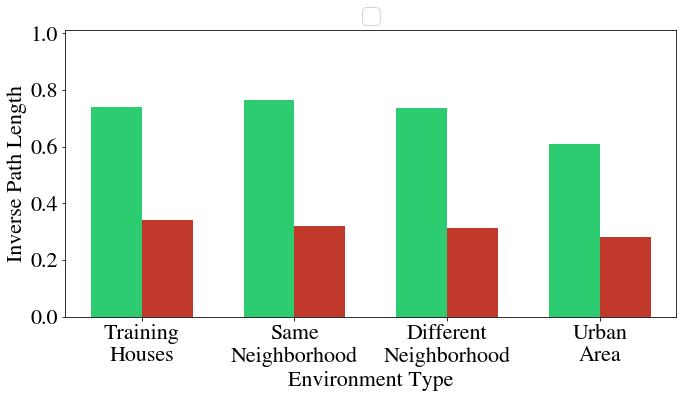

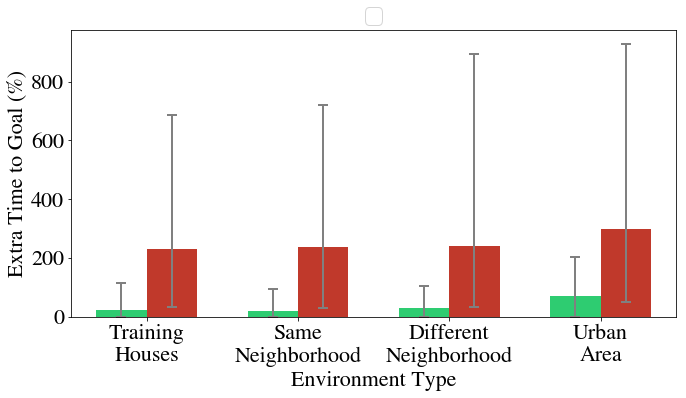

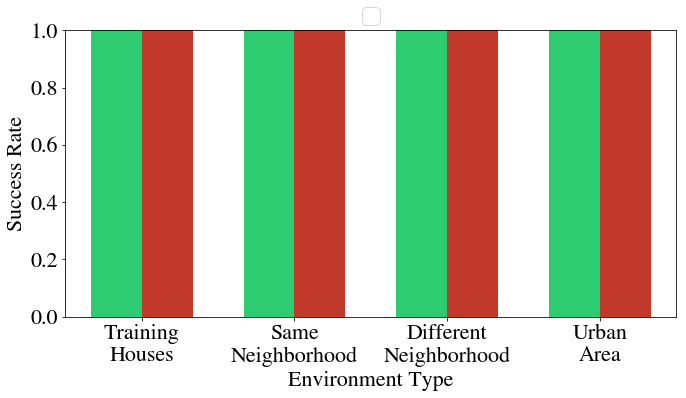

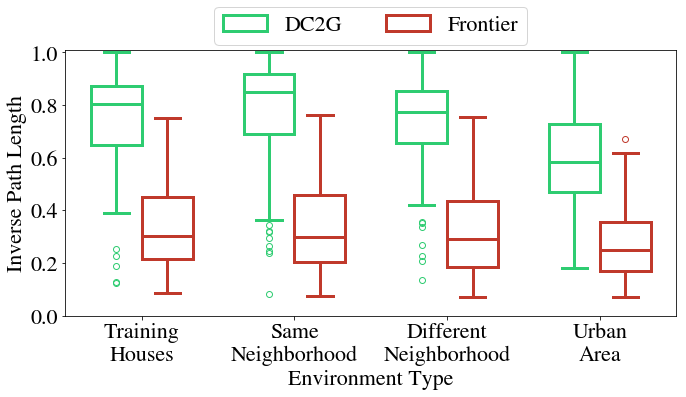

In [199]:
import numpy as np
import datetime
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 22
planner_dict = {
    "oracle": {
        "name": "Oracle",
        "color": "#3498db",
    },
    "dc2g": {
        "name": "DC2G",
        "color": "#2ecc71",
    },
    "dc2g_rescale": {
        "name": "DC2G-R",
        "color": "#f1c40f",
    },
    "frontier": {
        "name": "Frontier",
        "color": "#c0392b",
    },
}
stat_dict = {
    "episode_spl": {
        "ylabel": "SPL",
#         "ylabel": "SPL: Success weighted by\n inverse Path Length",
        "ylim": [0,1.01],
    },
    "inverse_path_length": {
        "ylabel": "Inverse Path Length",
        "ylim": [0,1.01],
    },
    "pct_extra_steps": {
        "ylabel": "Extra Time to Goal (%)",
        "ylim": [0, None],
    },
    "success": {
        "ylabel": "Success Rate",
        "ylim": [0,1],
    },
}
# difficulty_dict = [
#     ['easy', 'Training\nHouses'],
#     ['medium',  'Same\nNeighborhood'],
#     ['hard', 'Different\nNeighborhood'],
#     ['very_hard', 'Urban\nArea'],
# ]

def plot_stat(df, stat, mode, planners=None, difficulties=None, num_trials=None):

    if planners is None:
        planners = df["planner"].unique()
    num_planners = len(planners)
    
    if difficulties is None:
        difficulties = df["difficulty"].unique()
    num_bar_groups = len(difficulties)

    if num_trials is None:
        num_trials = len(df["scenario"].unique())

    bar_width = 0.1
    padding_btwn_bar_groups = 0.1
    num_bars = num_planners - 1
    bar_group_width = num_bars*bar_width
    ind = bar_group_width/2.0 + np.arange(num_bar_groups) * (bar_group_width + padding_btwn_bar_groups)
    
    legend_items = []
    legend_names = []

    fig, ax = plt.subplots(figsize=(10, 6))

    for group_i, difficulty in enumerate(['easy', 'medium', 'hard', 'very_hard']):
        for i, planner in enumerate(planners):
            if planner == "oracle": continue
            df_ = df[(df["planner"] == planner) & (df["difficulty"] == difficulty)]

            color = planner_dict[planner]['color']
            
            if group_i == 0:
                label = planner_dict[planner]['name']
            else:
                label = None
            
            bar_location = ind[group_i] - bar_group_width/2.0 + i*bar_width
            
            if mode == 'mean':
                mean = get_stat_mean(df_, stat)
                plot_mean(ax, bar_location, mean, bar_width, color, label)
            elif mode == 'mean_and_whiskers':
                median, lower_error, upper_error = get_stat_median_and_whiskers(df_, stat)
                plot_median_and_whiskers(ax, bar_location, median, lower_error, upper_error, bar_width, color, label)
            elif mode == 'boxplot':
                bp = plot_boxplot(ax, bar_location, df_[stat], bar_width, color)
                if label is not None:
                    legend_items.append(bp["boxes"][0])
                    legend_names.append(label)
    
    ylabel = stat_dict[stat]['ylabel']
    ax.set_ylabel(ylabel)
    ax.set_xticks(ind + bar_width/2.0)
    
    ax.set_xlim([ind[0]-bar_group_width/2,ind[-1]+bar_group_width])
    
    ax.set_ylim(bottom=stat_dict[stat]["ylim"][0], top=stat_dict[stat]["ylim"][1])
    
    ax.set_xticklabels(('Training\nHouses', 'Same\nNeighborhood', 'Different\nNeighborhood', 'Urban\nArea'))
    ax.set_xlabel('Environment Type')
    
    ax.legend(legend_items, legend_names, bbox_to_anchor=(0.5,1.02), loc="lower center",
                borderaxespad=0, ncol=3)
    
    plt.tight_layout()
    save_dir = "/home/mfe/Downloads"
#     filename = '{}/{}__{:%Y-%m-%d_%H_%M_%S}'.format(save_dir, latest_file.split('/')[-1][:-4], datetime.datetime.now())
    filename = '{}/{}_{:%Y-%m-%d_%H_%M_%S}'.format(save_dir, stat, datetime.datetime.now())
    plt.savefig(filename+".png")
    plt.savefig(filename+".pdf")
    plt.show()

def plot_mean(ax, bar_location, mean, bar_width, color, label):
    rects = ax.bar(bar_location,
                   mean, bar_width,
                   color=color, label=label,
                  )
def plot_median_and_whiskers(ax, bar_location, median, lower_error, upper_error, bar_width, color, label):
    rects = ax.bar(bar_location,
               median, bar_width,
               yerr=[[lower_error], [upper_error]],
               error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2),
               color=color, label=label,
              )

def plot_boxplot(ax, bar_location, data, width, color):
    linewidth = 3
    bp = ax.boxplot([data], positions=[bar_location], widths=0.1,
                patch_artist=True,
                boxprops=dict(facecolor="None", color=color, linewidth=linewidth),
                capprops=dict(color=color, linewidth=linewidth),
                whiskerprops=dict(color=color, linewidth=linewidth),
                flierprops=dict(color=color, markeredgecolor=color, linewidth=linewidth),
                medianprops=dict(color=color, linewidth=linewidth))
    return bp
    
def get_stat_mean(df, stat):
    mean = df[stat].mean()
    return mean

def get_stat_median_and_whiskers(df, stat):
    stats = df[stat].describe()
    median = stats["50%"]
    upper_quartile = stats["75%"]
    lower_quartile = stats["25%"]
    iqr = upper_quartile - lower_quartile
    upper_whisker = df[df[stat] <= (upper_quartile+1.5*iqr)][stat].max()
    lower_whisker = df[df[stat] >= (lower_quartile-1.5*iqr)][stat].min()
    upper_error = abs(median-upper_whisker)
    lower_error = abs(median-lower_whisker)
    return median, lower_error, upper_error

plot_stat(df, 'inverse_path_length', 'mean')
plot_stat(df, 'pct_extra_steps', 'mean_and_whiskers')
plot_stat(df, 'success', 'mean')
plot_stat(df, 'inverse_path_length', 'boxplot')

In [197]:
def add_stat_to_dataframe(df, stat='episode_spl', fn=episode_spl):
    df_new = df.copy(deep=True)
    if stat not in df_new.columns:
        df_new.set_value(0, stat, 100)

    for i, row in df_new.iterrows():
        val = fn(df, row)
        df_new.set_value(i, stat, val)
    return df_new

def episode_spl(df, row):
    oracle_row = df[(df["scenario"] == row["scenario"]) &
                        (df["difficulty"] == row["difficulty"]) &
                        (df["planner"] == "oracle")]
    episode_spl = row["success"] * oracle_row["num_steps"] / row["num_steps"]
    return episode_spl

def inverse_path_length(df, row):
    oracle_row = df[(df["scenario"] == row["scenario"]) &
                        (df["difficulty"] == row["difficulty"]) &
                        (df["planner"] == "oracle")]
    ipl = oracle_row["num_steps"] / row["num_steps"]
    return ipl

def extra_steps(df, row):
    oracle_row = df[(df["scenario"] == row["scenario"]) &
                        (df["difficulty"] == row["difficulty"]) &
                        (df["planner"] == "oracle")]
    extra_steps = row["num_steps"] - oracle_row["num_steps"]
    return extra_steps

def pct_extra_steps(df, row):
    oracle_row = df[(df["scenario"] == row["scenario"]) &
                        (df["difficulty"] == row["difficulty"]) &
                        (df["planner"] == "oracle")]
    extra_steps = 100.*(row["num_steps"] - oracle_row["num_steps"]) / oracle_row["num_steps"]
    return extra_steps

In [198]:
df = add_stat_to_dataframe(df, stat='episode_spl', fn=episode_spl)
df = add_stat_to_dataframe(df, stat='extra_steps', fn=extra_steps)
df = add_stat_to_dataframe(df, stat='pct_extra_steps', fn=pct_extra_steps)
df = add_stat_to_dataframe(df, stat='inverse_path_length', fn=inverse_path_length)
df.head()

,scenario,difficulty,num_steps,planner,success,world_id,episode_spl,extra_steps,pct_extra_steps,inverse_path_length
0,0,very_hard,23.0,oracle,1.0,worldn002m002h011,1.000000,0.0,0.000000,1.000000
1,0,very_hard,32.0,dc2g,1.0,worldn002m002h011,0.718750,9.0,39.130435,0.718750
2,0,very_hard,110.0,frontier,1.0,worldn002m002h011,0.209091,87.0,378.260870,0.209091
3,1,very_hard,37.0,oracle,1.0,worldn002m002h011,1.000000,0.0,0.000000,1.000000
4,1,very_hard,49.0,dc2g,1.0,worldn002m002h011,0.755102,12.0,32.432432,0.755102


In [ ]:
'''
Things to plot:
- [x] spl
- [x] success_rate
- [ ] extra_steps
- [x] pct_extra_steps
- [ ] distribution of normalized inverse path length

Add discussion to thesis about what to call task vis a vis Anderson 2018
'''